In [2]:
# Importing relevant packages, loading relevant data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

/Users/marielwiechers/my_env/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
crime_df = pd.read_csv('Crimes_-_2015_to_Present.csv')
crime_class_df = pd.read_csv('Crimes_classes.csv')
beats_df = pd.read_csv('beats.csv')
weather_df = pd.read_csv('weather_2015-2020.csv')

In [4]:
# Transforming crime data to datetime, indexing by such, limiting data to 2015-2020.
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df = crime_df.set_index('Date')
crime_df = crime_df['20150101' : '20201231']

In [5]:
# Creating features for month, week of the current year, day of the week, and hour of day .

crime_df['Month'] = crime_df.index.month
crime_df['Week'] = crime_df.index.week
crime_df['Day'] = crime_df.index.day
crime_df['Hour'] = crime_df.index.hour

def find_watch(n):
    if 0 <= n < 8:
        return 'First'
    elif 8 <= n < 16:
        return 'Second'
    elif 16 <= n:
        return 'Third'
        

crime_df['Watch'] = crime_df['Hour'].apply(find_watch)

crime_df.index = crime_df.index.date

In [6]:
# Transforming weather data to datetime, indexing by such.

weather_df['Date'] = pd.to_datetime(weather_df['DATE'])
weather_df = weather_df.set_index('Date')

In [7]:
# Merging weather data to crime data.

crime_df = pd.merge(crime_df, weather_df, how = 'left', left_index = True, right_index = True)

In [8]:
# Preparing crime classes to merge into crime data, and merging.

for index, row in crime_class_df.iterrows():
    if len(row['crime_id']) == 3:
        row['crime_id'] = '0' + row['crime_id']

crime_df = pd.merge(crime_df, crime_class_df, how = 'left', left_on = 'IUCR', right_on = 'crime_id')

# Merging beat data to crime data.  

crime_df = pd.merge(crime_df, beats_df, how = 'left', left_on = 'Beat', right_on = 'beat_num')

In [9]:
# Dropping undesired features.

col_list = ['ID','Arrest', 'Domestic', 'Beat', 'Year', 'Month', 'Week', 'Day', 'Hour', 'Watch', 
            'PRCP', 'SNOW','TMAX', 'TMIN', 'category_1', 'category_2', 'count_l_stops', 
            'count_bus_stops', 'count_metra_stops', 'count_restaurants', 'count_bars', 
            'count_daycares', 'count_entertainment', 'count_businesses', 'road_distance_ft', 
            'TOTAL POPULATION', 'dist_to_police', 'dist_to_hospital']

df = crime_df.filter(col_list)

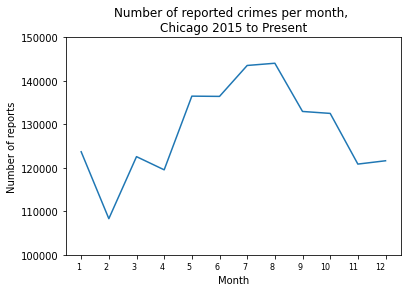

In [10]:
# Crime Count by month (5 year aggregate).

month_counts = df.groupby(by = [df.Month]).count()

month_counts['ID'].plot(kind='line')
plt.xticks(month_counts.index, rotation=0, size=8, ha='right')
plt.xlabel('Month')
plt.ylabel('Number of reports')
plt.ylim((100000,150000))
plt.title('Number of reported crimes per month, \nChicago 2015 to Present')
plt.show()

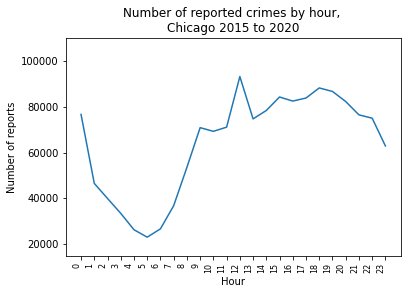

In [11]:
# Crime Count by time of day (5 year aggregate).

hour_counts = df.groupby(by = [df.Hour]).count()

hour_counts['ID'].plot(kind='line')
plt.xticks(hour_counts.index, rotation=90, size=8, ha='right')
plt.xlabel('Hour')
plt.ylabel('Number of reports')
plt.ylim((15000,110000))
plt.title('Number of reported crimes by hour, \nChicago 2015 to 2020')
plt.show()

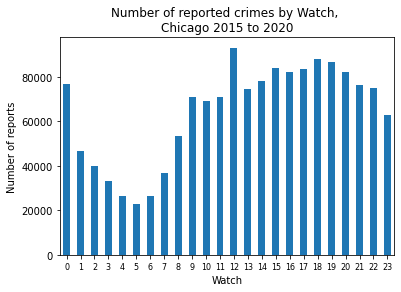

In [12]:
# Crime Count by watch/shift (5 year aggregate).

watch_counts = df.groupby(by = [df.Watch]).count()

hour_counts['ID'].plot(kind='bar')
plt.xticks(rotation=0, size=8, ha='center')
plt.xlabel('Watch')
plt.ylabel('Number of reports')
plt.title('Number of reported crimes by Watch, \nChicago 2015 to 2020')
plt.show()

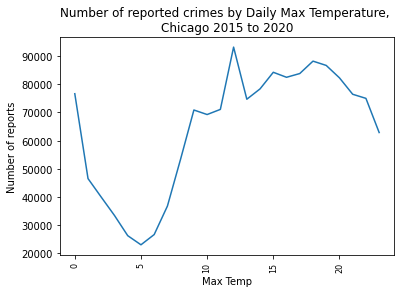

In [13]:
# Crime Count by maximum daily temperature (5 year aggregate).

temp_counts = df.groupby(by = [df.TMAX]).count()

hour_counts['ID'].plot(kind='line')
plt.xticks(rotation=90, size=8, ha='center')
plt.xlabel('Max Temp')
plt.ylabel('Number of reports')
plt.title('Number of reported crimes by Daily Max Temperature, \nChicago 2015 to 2020')
plt.show()

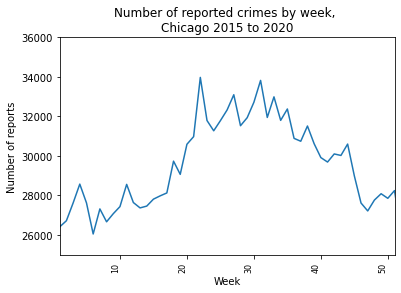

In [14]:
# Crime Count by week (5 year aggregate).

week_counts = df.groupby(by = [df.Week]).count()

week_counts['ID'].plot(kind='line')
plt.xticks(rotation=90, size=8, ha='right')
plt.xlabel('Week')
plt.ylabel('Number of reports')
plt.ylim((25000,36000))
plt.xlim((1,51))
plt.title('Number of reported crimes by week, \nChicago 2015 to 2020')
plt.show()

In [15]:
#Number of week/watch counts for a two-year period.

week_watch_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Week', 'Watch']).count()
print ('Week/ Watch max count:', week_watch_count['ID'].max())
print ('Week/ Watch min count:', week_watch_count['ID'].min())
print ('Week/ Watch median:', week_watch_count['ID'].median())

Week/ Watch max count: 5221
Week/ Watch min count: 1569
Week/ Watch median: 3908.5


In [16]:
#Number of month/hour counts for a two-year period.

week_watch_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Year', 'Hour']).count()
print ('Month/ Hour max count:', week_watch_count['ID'].max())
print ('Month/ Hour min count:', week_watch_count['ID'].min())
print ('Month/ Hour median:', week_watch_count['ID'].median())

Month/ Hour max count: 16634
Month/ Hour min count: 3867
Month/ Hour median: 12606.5


In [16]:
df.to_csv("df_2015_to_present.csv", index = False)

In [17]:
#add indicator column for serious crime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542564 entries, 0 to 1542563
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1542564 non-null  int64  
 1   Arrest               1542564 non-null  bool   
 2   Domestic             1542564 non-null  bool   
 3   Beat                 1542564 non-null  int64  
 4   Year                 1542564 non-null  int64  
 5   Month                1542564 non-null  int64  
 6   Week                 1542564 non-null  int64  
 7   Day                  1542564 non-null  int64  
 8   Hour                 1542564 non-null  int64  
 9   Watch                1542564 non-null  object 
 10  PRCP                 1542564 non-null  float64
 11  SNOW                 1541889 non-null  float64
 12  TMAX                 1542564 non-null  int64  
 13  TMIN                 1542564 non-null  int64  
 14  category_1           1542095 non-null  object 
 15

In [18]:
df.category_1.unique()

array(['serious', 'type II', 'minor', 'Non-Criminal', nan], dtype=object)

In [19]:
df[df['category_1'].isna()]

,ID,Arrest,Domestic,Beat,Year,Month,Week,Day,Hour,Watch,...,count_metra_stops,count_restaurants,count_bars,count_daycares,count_entertainment,count_businesses,road_distance_ft,TOTAL POPULATION,dist_to_police,dist_to_hospital
172450,10212100,True,False,131,2015,8,35,26,17,Third,...,0.0,67.0,30.0,10.0,8.0,153.0,0.688121,9953.361318,0.000184,0.013598
245916,10334141,True,False,411,2015,12,49,4,13,Second,...,2.0,16.0,0.0,1.0,0.0,58.0,0.707356,5470.665210,0.022253,0.008498
297015,10442132,False,False,1832,2016,2,7,19,16,Third,...,0.0,91.0,69.0,3.0,20.0,166.0,0.268514,8038.135255,0.014020,0.009861
392224,10577319,True,False,324,2016,6,26,27,20,Third,...,1.0,23.0,1.0,4.0,1.0,49.0,0.804798,7654.065927,0.016781,0.007209
634270,12311280,False,True,1531,2017,5,21,23,0,First,...,0.0,23.0,0.0,2.0,0.0,33.0,0.373960,6565.668557,0.024705,0.028583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538531,12252372,False,False,2412,2020,12,52,23,15,Second,...,0.0,93.0,5.0,5.0,2.0,165.0,0.756025,17772.958410,0.021143,0.026463
1538876,12257916,False,True,414,2020,12,52,24,8,Second,...,0.0,24.0,1.0,6.0,1.0,81.0,0.962700,11696.404888,0.034587,0.006471
1540741,12255593,False,True,934,2020,12,53,28,9,Second,...,0.0,13.0,0.0,2.0,0.0,15.0,0.721817,5060.251232,0.018511,0.029053
1541538,12262496,False,False,1633,2020,12,53,29,23,Third,...,0.0,64.0,18.0,9.0,2.0,174.0,1.051864,20708.358721,0.029355,0.006257


In [20]:
df.loc[df.category_1 == 'serious', 'serious'] = 1
df.serious.fillna(0, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542564 entries, 0 to 1542563
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1542564 non-null  int64  
 1   Arrest               1542564 non-null  bool   
 2   Domestic             1542564 non-null  bool   
 3   Beat                 1542564 non-null  int64  
 4   Year                 1542564 non-null  int64  
 5   Month                1542564 non-null  int64  
 6   Week                 1542564 non-null  int64  
 7   Day                  1542564 non-null  int64  
 8   Hour                 1542564 non-null  int64  
 9   Watch                1542564 non-null  object 
 10  PRCP                 1542564 non-null  float64
 11  SNOW                 1541889 non-null  float64
 12  TMAX                 1542564 non-null  int64  
 13  TMIN                 1542564 non-null  int64  
 14  category_1           1542095 non-null  object 
 15

In [ ]:
print ('Week/ Watch max count:', week_watch_serious_count['ID'].max())
print ('Week/ Watch min count:', week_watch_serious_count['ID'].min())
print ('Week/ Watch median:', week_watch_serious_count['ID'].median())

In [23]:
week_watch_serious_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Week', 'Watch','Beat']).serious.value_counts()
month_watch_serious_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Month', 'Watch','Beat']).serious.value_counts()
#week_hour_serious_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Week', 'Hour']).serious.value_counts()
#month_hour_serious_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Month', 'Hour']).serious.value_counts()


In [24]:
week_watch_serious_count

Week  Watch  Beat  serious
1     First  111   1.0         4
                   0.0         2
             112   1.0         3
             113   1.0         3
                   0.0         1
                              ..
52    Third  2533  0.0         7
             2534  0.0        11
                   1.0         7
             2535  0.0         3
                   1.0         2
Name: serious, Length: 82525, dtype: int64

count    19690.000000
mean        27.280396
std         19.245778
min          1.000000
25%         15.000000
50%         23.000000
75%         35.000000
max        394.000000
Name: serious, dtype: float64

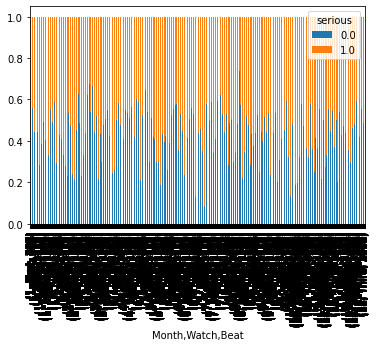

In [25]:
month_watch = df[df['Year'].between(2017, 2018, inclusive=True)].sort_values(['Year','Month']).groupby(['Month', 'Watch','Beat']).serious.value_counts(normalize=True)
month_watch.unstack().plot.bar(stacked=True)
month_watch_serious_count.describe()

count    82525.000000
mean         6.508949
std          5.046887
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        332.000000
Name: serious, dtype: float64

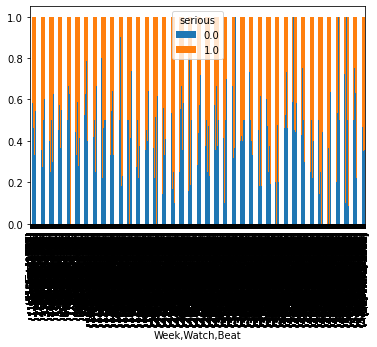

In [26]:
week_watch = df[df['Year'].between(2017, 2018, inclusive=True)].sort_values(['Year','Week']).groupby(['Week', 'Watch', 'Beat']).serious.value_counts(normalize=True)
week_watch.unstack().plot.bar(stacked=True)
week_watch_serious_count.describe()

NameError: name 'year_watch_serious_count' is not defined

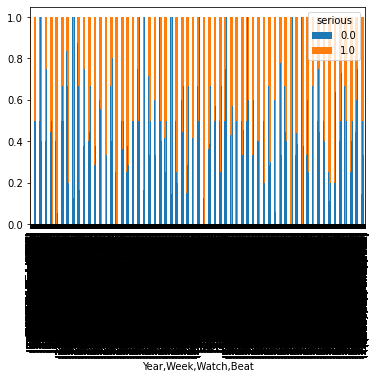

In [27]:
year_watch = df[df['Year'].between(2017, 2018, inclusive=True)].sort_values(['Year','Week']).groupby(['Year','Week', 'Watch', 'Beat']).serious.value_counts(normalize=True)
year_watch.unstack().plot.bar(stacked=True)
year_watch_serious_count.describe()